# Murder Mystery Tamam Shud

In December 1948 the dead body of a man was found near Adelaide, Australia. To this day his identity is unknown and his death is still a mystery. One of the only clues recovered to what happened is a small piece of paper with the words "Tamam Shud" written on it. The piece has turned out to be torn from the last page of the book "Rubaiyat" by Omar Khayyam. The police managed to find the copy of the book from which the piece was torn. This book had some letters written inside the cover:

**WRGOABABD**

**MLIAOI**

**WTBIMPANETP**

**MLIABOAIAQC**

**ITTMTSAMSTGAB**

The second line seems to have been crossed out. The similarity to the penultimate line could suggest that it was a mistake.

What does this mean? Is it some kind of code?

![Tamam Shud](https://storage.googleapis.com/big-data-course-datasets/Actual-tamam-shud.jpg)

![Code](https://storage.googleapis.com/big-data-course-datasets/SomertonManCode.jpg)

In [25]:
code=["WRGOABABD",
#"MLIAOI",
"WTBIMPANETP",
"MLIABOAIAQC",
"ITTMTSAMSTGAB"]

In [26]:
from scipy import stats
import numpy as np
import pandas as pd

In [27]:
books=spark.sparkContext.textFile("gs://big-data-course-datasets/gutenberg/").cache()

In [28]:
import string

counts=books.flatMap(lambda x: x.replace(",", "").split()) \
    .filter(lambda x: len(x)>0) \
    .map(lambda x: x[0].upper()) \
    .filter(lambda x: x in string.ascii_uppercase) \
    .map(lambda x: (x, 1)) \
    .reduceByKey(lambda x,y: x+y) \
    .collect()

In [30]:
counts

[('C', 73345),
 ('N', 48820),
 ('H', 151054),
 ('Y', 32791),
 ('X', 100),
 ('W', 137955),
 ('S', 162160),
 ('O', 130771),
 ('D', 55619),
 ('K', 14483),
 ('J', 13206),
 ('G', 40746),
 ('A', 242153),
 ('V', 12893),
 ('F', 78982),
 ('M', 91287),
 ('R', 34603),
 ('P', 53167),
 ('Q', 3571),
 ('B', 97838),
 ('T', 347977),
 ('L', 56497),
 ('I', 128541),
 ('E', 41718),
 ('U', 31154),
 ('Z', 1058)]

In [31]:
book_frequencies=np.zeros(len(string.ascii_uppercase))
for key in dict(counts).keys():
    book_frequencies[string.ascii_uppercase.index(key)]+=dict(counts)[key]
    
book_frequencies=book_frequencies/sum(book_frequencies)

In [32]:
code_frequencies=np.zeros(len(string.ascii_uppercase))
for letter in "".join(code):
    code_frequencies[string.ascii_uppercase.index(letter)]+=1


In [33]:
data=pd.DataFrame(data={"letter": list(string.ascii_uppercase), 
                   "book_freq": book_frequencies, 
                   "code_freq": code_frequencies})

data["expected_freq_book"]=data["code_freq"].sum()*data["book_freq"]

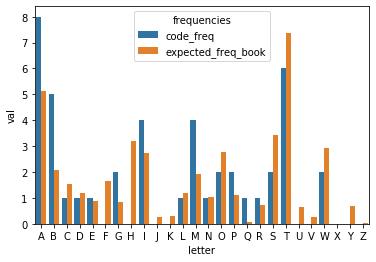

In [34]:
import seaborn as sns

sns.barplot(x="letter", 
            y="val",
            hue="frequencies",
            data=data[["letter", "code_freq", "expected_freq_book"]].melt(id_vars=["letter"], var_name="frequencies", value_name="val"))

In [35]:
stats.chisquare(data["code_freq"], data["expected_freq_book"])

Power_divergenceResult(statistic=30.940002102352494, pvalue=0.1910131742960432)

In [36]:
stats.chisquare(data["code_freq"], np.ones(len(data))/len(data))

Power_divergenceResult(statistic=4697.0, pvalue=0.0)

So the frequencies of the code fits the starting letters of words in English. But, perhaps, it is not the starting letters, but some mutations of words. How well does the code fit the general usage of letters in the English language?

To answer this, redo the calculation of the letter frequencies, but this time take all letters into account, not just the start of each word.

In [29]:
#counts=books.flatMap(lambda x: x.replace(",", "").split()) \
#    .filter(lambda x: len(x)>0) \
#    .flatMap(lambda x: list(x.upper())) \
#    .filter(lambda x: x in string.ascii_uppercase) \
#    .map(lambda x: (x, 1)) \
#    .reduceByKey(lambda x,y: x+y) \
#    .collect()